# 3.5

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 3.5.3

The following computes $\frac{dy(3)}{dx}$ with $y = x^2$ 

In [16]:
x = tf.Variable(3.0)
with tf.GradientTape() as t1:
    y = x**2

dy_dx = t1.gradient(y, x)

In [17]:
dy_dx.numpy()

6.0

## 3.5.4

Generate synthetic separable data

(2000, 2)
(2000, 1)


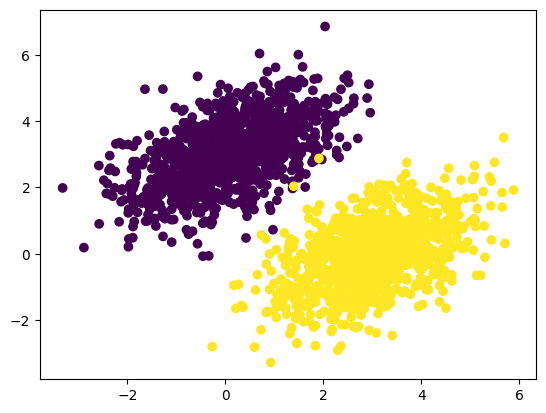

In [18]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets.shape)

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])

Creating a linear classifier

In [19]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Forward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

# Loss
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# Training step
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
        
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# Batch training
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 1.3591
Loss at step 1: 0.2445
Loss at step 2: 0.1272
Loss at step 3: 0.1054
Loss at step 4: 0.0965
Loss at step 5: 0.0897
Loss at step 6: 0.0838
Loss at step 7: 0.0784
Loss at step 8: 0.0735
Loss at step 9: 0.0691
Loss at step 10: 0.0651
Loss at step 11: 0.0614
Loss at step 12: 0.0581
Loss at step 13: 0.0551
Loss at step 14: 0.0524
Loss at step 15: 0.0499
Loss at step 16: 0.0476
Loss at step 17: 0.0456
Loss at step 18: 0.0437
Loss at step 19: 0.0421
Loss at step 20: 0.0405
Loss at step 21: 0.0391
Loss at step 22: 0.0379
Loss at step 23: 0.0367
Loss at step 24: 0.0357
Loss at step 25: 0.0348
Loss at step 26: 0.0339
Loss at step 27: 0.0331
Loss at step 28: 0.0324
Loss at step 29: 0.0318
Loss at step 30: 0.0312
Loss at step 31: 0.0307
Loss at step 32: 0.0302
Loss at step 33: 0.0297
Loss at step 34: 0.0294
Loss at step 35: 0.0290
Loss at step 36: 0.0287
Loss at step 37: 0.0284
Loss at step 38: 0.0281
Loss at step 39: 0.0279


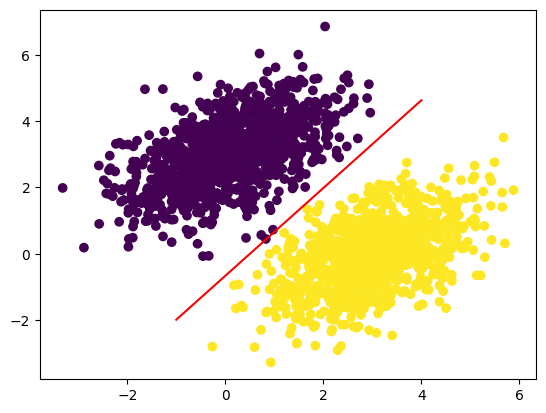

In [20]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()


